In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
 import os, csv
data_path = os.path.join('titanic.csv')
print(data_path)

titanic.csv


In [3]:
 !type titanic.csv

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/

In [4]:
 with open('titanic.csv', 'r') as infile:
    reader = csv.reader(infile)
    data=list(reader)

#print(data)

In [5]:
a=len(data)
print("ilosc linijek w pliku:",a)

ilosc linijek w pliku: 892


In [6]:
#Procent pasażerów, którzy przeżyli, w tym podział na płeć
p=0 #pasażerowie
k=0 #kobiety
m=0 #mężczyźni

for i in range(1,len(data)):
    if data[i][1]=='1':
        p=p+1
        if data[i][4]=='female':
            k=k+1
        else:
            m=m+1
            
w=len(data)-1
wszyscy=(p/w)*100
kobiety=(k/p)*100
mezczyzni=(m/p)*100
w1=round(wszyscy,0)
k1=round(kobiety,0)
m1=round(mezczyzni,0)

print("Przeżyło: ",w1,"% pasażerów, w tym: ", k1,"% kobiet i ", m1, "% mężczyzn.")


Przeżyło:  38.0 % pasażerów, w tym:  68.0 % kobiet i  32.0 % mężczyzn.


In [7]:
#Funckcja zwracająca słownik z liczbami osób, które: przeżyły, zginęły, nie wiadomo
def titanic_function(data):
    z=0 #osoby, które przeżyły
    s=0 #osoby, które zginęły
    n=0 #nie wiadomo

    for i in range(1,len(data)):
        if data[i][1]=='1':
            z=z+1
        elif data[i][1]=='0':
            s=s+1
        else:
            n=n+1
    a={'nieznany': n, 'przetrwało': z, 'nie przetrwało': s}
    return(a)

print(titanic_function(data))

{'nieznany': 0, 'przetrwało': 342, 'nie przetrwało': 549}


In [8]:
#Średniego wiek pasażerów, w tym podział na płeć
wiek=0 #wiek wszystkich pasażerów
pasazerowie=len(data)-1
kob=0 #wiek kobiet
mez=0 #wiek mężczyzn
sk=0 #ilosc kobiet
sm=0 #ilosc mezczyzn

for i in range(1,len(data)):
    if data[i][5]:
        wiek=wiek+ float(data[i][5])
        if data[i][4]=='female':
            sk=sk+1
            kob=kob+float(data[i][5])
        else:
            sm=sm+1
            mez=mez+float(data[i][5])

sr=round(wiek/pasazerowie,2)
ksr=round(kob/sk,2)
msr=round(mez/sm,2)


print("Średni wiek wszystkich pasażerów: ",sr)
print("Średni wiek kobiet: ",ksr)
print("Średni wiek mężczyzn: ", msr)

Średni wiek wszystkich pasażerów:  23.8
Średni wiek kobiet:  27.92
Średni wiek mężczyzn:  30.73


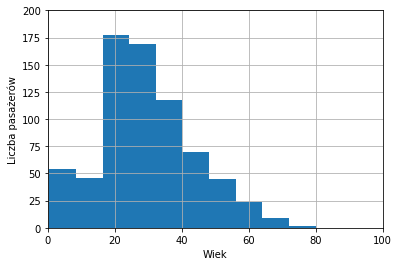

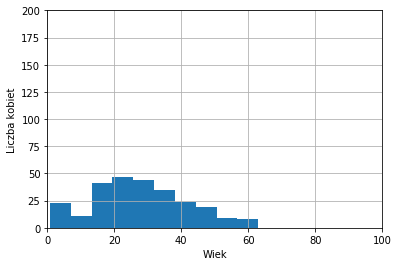

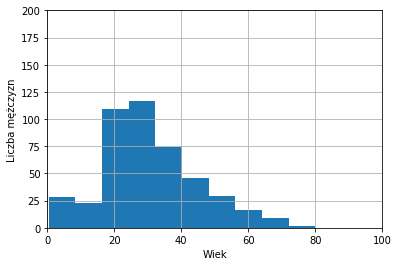

In [21]:
#Histogramy z wiekiem pasażerów: ogólny, dla kobiet, dla mężczyzn
wp=[] #lista wieku wszystkich pasażerów
wk=[] #lista wieku kobiet
wm=[] #lista wieku mężczyzn

for i in range(1,len(data)):
    if data[i][5]:
        wp.append(float(data[i][5]))
        if data[i][4]=='female':
            wk.append(float(data[i][5]))
        else:
            wm.append(float(data[i][5]))        
        

h1=plt.hist(wp, label="Wszyscy pasażerowie")
plt.xlabel('Wiek')
plt.ylabel('Liczba pasażerów')
plt.axis([0,100,0,200])
plt.grid(True)
plt.show(h1)

h2=plt.hist(wk, label="Kobiety")
plt.xlabel('Wiek')
plt.ylabel('Liczba kobiet')
plt.axis([0, 100, 0, 200])
plt.grid(True)
plt.show(h2)

h3=plt.hist(wm, label="Mężczyźni")
plt.xlabel('Wiek')
plt.ylabel('Liczba mężczyzn')
plt.axis([0, 100, 0, 200])
plt.grid(True)
plt.show(h3)

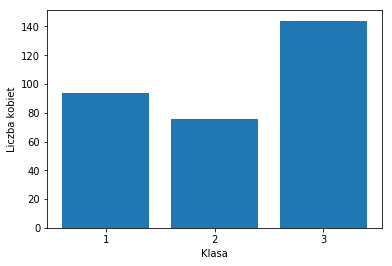

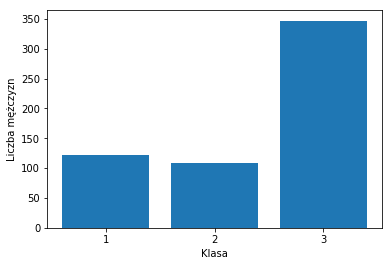

In [60]:
#Histogramy pokazujące liczbę kobiet oraz mężczyzn w poszczególnych klasach
k1=[]
k2=[]
k3=[]
m1=[]
m2=[]
m3=[]

for i in range(1,len(data)):
    if data[i][4]=='female':
        if data[i][2]=='1':
            k1.append(float(data[i][2]))
        elif data[i][2]=='2':
            k2.append(float(data[i][2]))
        else:
            k3.append(float(data[i][2]))
    else:
        if data[i][2]=='1':
            m1.append(float(data[i][2]))
        elif data[i][2]=='2':
            m2.append(float(data[i][2]))
        else:
            m3.append(float(data[i][2]))

kl=('1', '2', '3')
kkl=[len(k1), len(k2), len(k3)]

klkob=np.arange(len(kl))
plt.xticks(klkob, kl)
plt.xlabel('Klasa')
plt.ylabel('Liczba kobiet')
plt.bar(kl,kkl)
plt.show()
         
ml=('1', '2', '3')
mkl=[len(m1), len(m2), len(m3)]

klmez=np.arange(len(ml))
plt.xticks(klmez, ml)
plt.xlabel('Klasa')
plt.ylabel('Liczba mężczyzn')
plt.bar(ml,mkl)
plt.show()


